In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from prophet import Prophet
import gradio as gr



In [2]:
df= pd.read_csv('long_data_.csv')

<Axes: xlabel='States'>

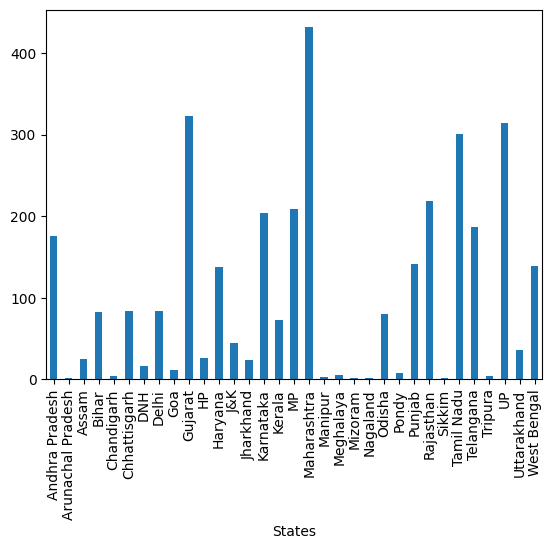

In [3]:
# @title Usage Distribution by State


df.groupby('States')['Usage'].mean().plot(kind='bar')

In [4]:
df.dropna(subset=['Dates'], inplace=True)


In [5]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02-01-2019 00:00,119.9
1,Haryana,NR,28.450006,77.019991,02-01-2019 00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02-01-2019 00:00,234.1
3,Delhi,NR,28.669993,77.230004,02-01-2019 00:00,85.8
4,UP,NR,27.599981,78.050006,02-01-2019 00:00,313.9


In [6]:
from dateutil import parser

def parse_date(date_str):
    formats = ["%d/%m/%Y %H:%M:%S", "%d-%m-%Y %H:%M"]
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    # Fallback to dateutil parser for unhandled formats
    return parser.parse(date_str, dayfirst=True)  # Adjust `dayfirst` as needed

df['Dates'] = df['Dates'].apply(parse_date)



In [7]:
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')


In [8]:
# Feature extraction
df['year'] = df['Dates'].dt.year
df['month'] = df['Dates'].dt.month
df['day'] = df['Dates'].dt.day
df['weekday'] = df['Dates'].dt.weekday
df['weekday_name'] = df['Dates'].dt.strftime('%A')
df['month_name'] = df['Dates'].dt.strftime('%B')

In [9]:


# Prepare data for Prophet
def prepare_data_for_prophet(state):
    state_df = df[df['States'] == state]
    df_prophet = state_df[['Dates', 'Usage']].rename(columns={'Dates': 'ds', 'Usage': 'y'})
    return df_prophet

state_models = {}

In [10]:
for state in df['States'].unique():
    df_prophet = prepare_data_for_prophet(state)
    if not df_prophet.empty:
        train_size = int(len(df_prophet) * 0.8)
        train_df = df_prophet.iloc[:train_size]
        print(train_df)
        model = Prophet()
        model.fit(train_df)
        print(state)

        state_models[state] = model

              ds      y
0     2019-01-02  119.9
33    2019-01-03  121.9
66    2019-01-04  118.8
99    2019-01-05  121.0
132   2019-01-06  121.4
...          ...    ...
13101 2020-02-22  107.4
13134 2020-02-23  150.1
13167 2020-02-24  156.9
13200 2020-02-25  169.9
13233 2020-02-26  168.9

[402 rows x 2 columns]


19:39:20 - cmdstanpy - INFO - Chain [1] start processing
19:39:20 - cmdstanpy - INFO - Chain [1] done processing
19:39:20 - cmdstanpy - INFO - Chain [1] start processing
19:39:20 - cmdstanpy - INFO - Chain [1] done processing


Punjab
              ds      y
1     2019-01-02  130.3
34    2019-01-03  133.5
67    2019-01-04  128.2
100   2019-01-05  127.5
133   2019-01-06  132.6
...          ...    ...
13102 2020-02-22  116.6
13135 2020-02-23  156.6
13168 2020-02-24  165.3
13201 2020-02-25  169.2
13234 2020-02-26  170.7

[402 rows x 2 columns]
Haryana
              ds      y
2     2019-01-02  234.1
35    2019-01-03  240.2
68    2019-01-04  239.8
101   2019-01-05  239.1
134   2019-01-06  240.4
...          ...    ...
13103 2020-02-22  233.9
13136 2020-02-23  223.1
13169 2020-02-24  230.6
13202 2020-02-25  239.3
13235 2020-02-26  242.0

[402 rows x 2 columns]


19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:21 - cmdstanpy - INFO - Chain [1] done processing
19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:21 - cmdstanpy - INFO - Chain [1] done processing


Rajasthan
              ds      y
3     2019-01-02   85.8
36    2019-01-03   85.5
69    2019-01-04   83.5
102   2019-01-05   79.2
135   2019-01-06   76.6
...          ...    ...
13104 2020-02-22   65.4
13137 2020-02-23  106.7
13170 2020-02-24  110.7
13203 2020-02-25  114.5
13236 2020-02-26  117.1

[402 rows x 2 columns]
Delhi
              ds      y
4     2019-01-02  313.9
37    2019-01-03  311.8
70    2019-01-04  320.7
103   2019-01-05  299.0
136   2019-01-06  286.8
...          ...    ...
13105 2020-02-22  285.5
13138 2020-02-23  380.9
13171 2020-02-24  395.5
13204 2020-02-25  408.6
13237 2020-02-26  419.6

[402 rows x 2 columns]


19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:21 - cmdstanpy - INFO - Chain [1] done processing
19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:21 - cmdstanpy - INFO - Chain [1] done processing


UP
              ds     y
5     2019-01-02  40.7
38    2019-01-03  39.3
71    2019-01-04  38.1
104   2019-01-05  39.2
137   2019-01-06  39.2
...          ...   ...
13106 2020-02-22  35.6
13139 2020-02-23  48.5
13172 2020-02-24  43.0
13205 2020-02-25  43.6
13238 2020-02-26  43.8

[402 rows x 2 columns]
Uttarakhand
              ds     y
6     2019-01-02  30.0
39    2019-01-03  30.1
72    2019-01-04  30.1
105   2019-01-05  30.2
138   2019-01-06  31.0
...          ...   ...
13107 2020-02-22  27.3
13140 2020-02-23  26.7
13173 2020-02-24  27.4
13206 2020-02-25  28.4
13239 2020-02-26  28.0

[402 rows x 2 columns]


19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:21 - cmdstanpy - INFO - Chain [1] done processing
19:39:21 - cmdstanpy - INFO - Chain [1] start processing
19:39:21 - cmdstanpy - INFO - Chain [1] done processing


HP
              ds     y
7     2019-01-02  52.5
40    2019-01-03  54.1
73    2019-01-04  53.2
106   2019-01-05  51.5
139   2019-01-06  53.2
...          ...   ...
13108 2020-02-22  54.2
13141 2020-02-23  46.4
13174 2020-02-24  45.0
13207 2020-02-25  45.8
13240 2020-02-26  47.2

[402 rows x 2 columns]
J&K
              ds    y
8     2019-01-02  5.0
41    2019-01-03  4.9
74    2019-01-04  4.8
107   2019-01-05  4.3
140   2019-01-06  4.3
...          ...  ...
13109 2020-02-22  3.2
13142 2020-02-23  4.9
13175 2020-02-24  4.9
13208 2020-02-25  5.1
13241 2020-02-26  5.4

[402 rows x 2 columns]


19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing
19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing


Chandigarh
              ds     y
9     2019-01-02  78.7
42    2019-01-03  78.8
75    2019-01-04  74.8
108   2019-01-05  69.0
141   2019-01-06  68.1
...          ...   ...
13110 2020-02-22  81.8
13143 2020-02-23  96.3
13176 2020-02-24  95.4
13209 2020-02-25  95.2
13242 2020-02-26  97.0

[402 rows x 2 columns]


19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing


Chhattisgarh
              ds      y
10    2019-01-02  319.5
43    2019-01-03  316.7
76    2019-01-04  301.9
109   2019-01-05  313.2
142   2019-01-06  320.7
...          ...    ...
13111 2020-02-22  315.6
13144 2020-02-23  373.2
13177 2020-02-24  379.4
13210 2020-02-25  373.5
13243 2020-02-26  376.2

[402 rows x 2 columns]
Gujarat
              ds      y
11    2019-01-02  253.0
44    2019-01-03  253.6
77    2019-01-04  239.3
110   2019-01-05  228.2
143   2019-01-06  227.4
...          ...    ...
13112 2020-02-22  253.7
13145 2020-02-23  208.7
13178 2020-02-24  209.7
13211 2020-02-25  210.6
13244 2020-02-26  213.5

[402 rows x 2 columns]


19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing
19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing


MP
              ds      y
12    2019-01-02  428.6
45    2019-01-03  419.6
78    2019-01-04  395.8
111   2019-01-05  411.1
144   2019-01-06  408.6
...          ...    ...
13113 2020-02-22  401.3
13146 2020-02-23  497.2
13179 2020-02-24  504.1
13212 2020-02-25  501.8
13245 2020-02-26  496.2

[402 rows x 2 columns]


19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:22 - cmdstanpy - INFO - Chain [1] done processing


Maharashtra
              ds     y
13    2019-01-02  12.8
46    2019-01-03  13.7
79    2019-01-04  12.6
112   2019-01-05  13.0
145   2019-01-06  12.9
...          ...   ...
13114 2020-02-22   9.5
13147 2020-02-23  10.7
13180 2020-02-24  10.7
13213 2020-02-25  10.7
13246 2020-02-26  10.7

[402 rows x 2 columns]
Goa
              ds     y
14    2019-01-02  18.6
47    2019-01-03  18.2
80    2019-01-04  16.7
113   2019-01-05  17.6
146   2019-01-06  18.6
...          ...   ...
13115 2020-02-22  17.3
13148 2020-02-23  18.4
13181 2020-02-24  18.5
13214 2020-02-25  18.5
13247 2020-02-26  18.3

[402 rows x 2 columns]


19:39:23 - cmdstanpy - INFO - Chain [1] start processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing
19:39:23 - cmdstanpy - INFO - Chain [1] start processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing


DNH
              ds      y
15    2019-01-02  164.6
48    2019-01-03  170.1
81    2019-01-04  165.2
114   2019-01-05  167.4
147   2019-01-06  171.2
...          ...    ...
13116 2020-02-22  161.7
13149 2020-02-23  196.6
13182 2020-02-24  196.5
13215 2020-02-25  195.6
13248 2020-02-26  201.7

[402 rows x 2 columns]
Andhra Pradesh
              ds      y
16    2019-01-02  204.2
49    2019-01-03  204.5
82    2019-01-04  201.2
115   2019-01-05  201.7
148   2019-01-06  194.9
...          ...    ...
13117 2020-02-22  178.7
13150 2020-02-23  169.7
13183 2020-02-24  174.8
13216 2020-02-25  174.5
13249 2020-02-26  172.5

[402 rows x 2 columns]


19:39:23 - cmdstanpy - INFO - Chain [1] start processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing
19:39:23 - cmdstanpy - INFO - Chain [1] start processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing


Telangana
              ds      y
17    2019-01-02  206.3
50    2019-01-03  212.2
83    2019-01-04  205.3
116   2019-01-05  212.4
149   2019-01-06  217.5
...          ...    ...
13118 2020-02-22  201.9
13151 2020-02-23  236.2
13184 2020-02-24  226.9
13217 2020-02-25  220.8
13250 2020-02-26  228.3

[402 rows x 2 columns]
Karnataka
              ds     y
18    2019-01-02  72.7
51    2019-01-03  73.6
84    2019-01-04  73.4
117   2019-01-05  75.4
150   2019-01-06  75.4
...          ...   ...
13119 2020-02-22  60.3
13152 2020-02-23  84.4
13185 2020-02-24  86.1
13218 2020-02-25  84.0
13251 2020-02-26  83.1

[402 rows x 2 columns]


19:39:23 - cmdstanpy - INFO - Chain [1] start processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing
19:39:23 - cmdstanpy - INFO - Chain [1] start processing


Kerala
              ds      y
19    2019-01-02  268.3
52    2019-01-03  285.2
85    2019-01-04  270.3
118   2019-01-05  286.8
151   2019-01-06  298.3
...          ...    ...
13120 2020-02-22  275.1
13153 2020-02-23  349.6
13186 2020-02-24  343.7
13219 2020-02-25  330.9
13252 2020-02-26  332.9

[402 rows x 2 columns]


19:39:23 - cmdstanpy - INFO - Chain [1] done processing
19:39:23 - cmdstanpy - INFO - Chain [1] start processing
19:39:23 - cmdstanpy - INFO - Chain [1] done processing


Tamil Nadu
              ds    y
20    2019-01-02  6.3
53    2019-01-03  6.5
86    2019-01-04  6.4
119   2019-01-05  6.6
152   2019-01-06  7.2
...          ...  ...
13121 2020-02-22  7.3
13154 2020-02-23  8.9
13187 2020-02-24  8.7
13220 2020-02-25  8.4
13253 2020-02-26  8.1

[402 rows x 2 columns]
Pondy
              ds      y
21    2019-01-02   82.3
54    2019-01-03   82.0
87    2019-01-04   82.9
120   2019-01-05   77.0
153   2019-01-06   76.4
...          ...    ...
13122 2020-02-22   75.7
13155 2020-02-23   88.1
13188 2020-02-24   92.8
13221 2020-02-25   98.6
13254 2020-02-26  100.3

[402 rows x 2 columns]


19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing
19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing


Bihar
              ds     y
22    2019-01-02  24.8
55    2019-01-03  25.6
88    2019-01-04  26.3
121   2019-01-05  23.0
154   2019-01-06  22.6
...          ...   ...
13123 2020-02-22  24.8
13156 2020-02-23  25.3
13189 2020-02-24  26.7
13222 2020-02-25  26.7
13255 2020-02-26  27.5

[402 rows x 2 columns]
Jharkhand
              ds     y
23    2019-01-02  70.2
56    2019-01-03  67.9
89    2019-01-04  66.3
122   2019-01-05  65.8
155   2019-01-06  62.9
...          ...   ...
13124 2020-02-22  68.3
13157 2020-02-23  66.7
13190 2020-02-24  74.0
13223 2020-02-25  80.3
13256 2020-02-26  82.2

[402 rows x 2 columns]


19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing
19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing


Odisha
              ds      y
24    2019-01-02  108.2
57    2019-01-03  110.2
90    2019-01-04  106.8
123   2019-01-05  107.0
156   2019-01-06  106.4
...          ...    ...
13125 2020-02-22  104.1
13158 2020-02-23  164.0
13191 2020-02-24  183.5
13224 2020-02-25  194.5
13257 2020-02-26  194.6

[402 rows x 2 columns]
West Bengal
              ds    y
25    2019-01-02  2.0
58    2019-01-03  1.9
91    2019-01-04  1.7
124   2019-01-05  2.0
157   2019-01-06  2.0
...          ...  ...
13126 2020-02-22  1.4
13159 2020-02-23  1.2
13192 2020-02-24  1.1
13225 2020-02-25  1.1
13258 2020-02-26  1.4

[402 rows x 2 columns]


19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing
19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:24 - cmdstanpy - INFO - Chain [1] done processing


Sikkim
              ds    y
26    2019-01-02  2.1
59    2019-01-03  2.2
92    2019-01-04  2.2
125   2019-01-05  2.2
158   2019-01-06  2.2
...          ...  ...
13127 2020-02-22  2.2
13160 2020-02-23  1.9
13193 2020-02-24  1.9
13226 2020-02-25  2.1
13259 2020-02-26  2.2

[402 rows x 2 columns]
Arunachal Pradesh
              ds     y
27    2019-01-02  21.7
60    2019-01-03  23.4
93    2019-01-04  21.7
126   2019-01-05  22.5
159   2019-01-06  21.7
...          ...   ...
13128 2020-02-22  23.4
13161 2020-02-23  23.0
13194 2020-02-24  23.9
13227 2020-02-25  24.5
13260 2020-02-26  23.1

[402 rows x 2 columns]


19:39:24 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing


Assam
              ds    y
28    2019-01-02  2.7
61    2019-01-03  2.4
94    2019-01-04  2.4
127   2019-01-05  2.7
160   2019-01-06  2.7
...          ...  ...
13129 2020-02-22  2.7
13162 2020-02-23  2.3
13195 2020-02-24  2.4
13228 2020-02-25  2.6
13261 2020-02-26  2.6

[402 rows x 2 columns]
Manipur
              ds    y
29    2019-01-02  6.1
62    2019-01-03  6.5
95    2019-01-04  6.3
128   2019-01-05  5.7
161   2019-01-06  6.2
...          ...  ...
13130 2020-02-22  6.3
13163 2020-02-23  5.6
13196 2020-02-24  5.0
13229 2020-02-25  5.3
13262 2020-02-26  5.5

[402 rows x 2 columns]


19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing


Meghalaya
              ds    y
30    2019-01-02  1.9
63    2019-01-03  1.8
96    2019-01-04  1.7
129   2019-01-05  1.8
162   2019-01-06  1.9
...          ...  ...
13131 2020-02-22  1.9
13164 2020-02-23  1.7
13197 2020-02-24  1.8
13230 2020-02-25  1.6
13263 2020-02-26  1.6

[402 rows x 2 columns]
Mizoram
              ds    y
31    2019-01-02  2.2
64    2019-01-03  2.2
97    2019-01-04  2.2
130   2019-01-05  2.3
163   2019-01-06  2.3
...          ...  ...
13132 2020-02-22  2.1
13165 2020-02-23  2.0
13198 2020-02-24  2.0
13231 2020-02-25  2.3
13264 2020-02-26  2.3

[402 rows x 2 columns]


19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing
19:39:25 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing


Nagaland
              ds    y
32    2019-01-02  3.4
65    2019-01-03  3.6
98    2019-01-04  3.5
131   2019-01-05  3.5
164   2019-01-06  3.3
...          ...  ...
13133 2020-02-22  3.8
13166 2020-02-23  4.6
13199 2020-02-24  4.9
13232 2020-02-25  4.5
13265 2020-02-26  4.9

[402 rows x 2 columns]
Tripura
